<a href="https://colab.research.google.com/github/DLShrankhala/DevelipingVariousLSTMModelForTimeSeriesForecasting-ai-25/blob/main/LSTM_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/^IXIC.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-06-01,2467.510010,2470.530029,2411.969971,2412.030029,2412.030029,743680000
1,1999-06-02,2411.320068,2436.570068,2364.590088,2432.409912,2432.409912,895580000
2,1999-06-03,2440.750000,2444.040039,2402.290039,2403.320068,2403.320068,819310000
3,1999-06-04,2419.459961,2478.340088,2419.459961,2478.340088,2478.340088,885690000
4,1999-06-07,2490.830078,2528.050049,2478.340088,2524.209961,2524.209961,874770000


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6285,2024-05-22,16839.019531,16855.269531,16712.089844,16801.539063,16801.539063,7277340000
6286,2024-05-23,16996.390625,16996.390625,16678.369141,16736.029297,16736.029297,7752800000
6287,2024-05-24,16786.789063,16947.800781,16771.580078,16920.789063,16920.789063,5836040000
6288,2024-05-28,16988.310547,17032.660156,16917.509766,17019.880859,17019.880859,6293380000
6289,2024-05-29,16879.349609,16989.599609,16873.970703,16920.580078,16920.580078,6652480000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.834737,0.834206,0.835798,0.835042,0.835042,0.652222
Open,0.834737,1.000000,0.999940,0.999911,0.999835,0.999835,0.818925
High,0.834206,0.999940,1.000000,0.999885,0.999911,0.999911,0.820343
Low,0.835798,0.999911,0.999885,1.000000,0.999923,0.999923,0.817089
Close,0.835042,0.999835,0.999911,0.999923,1.000000,1.000000,0.818664
Adj Close,0.835042,0.999835,0.999911,0.999923,1.000000,1.000000,0.818664
Volume,0.652222,0.818925,0.820343,0.817089,0.818664,0.818664,1.000000


In [ ]:
df1=df.reset_index()['Close']

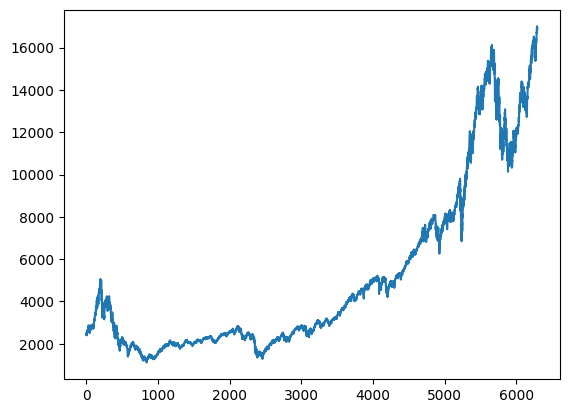

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)


In [ ]:
df2=df.reset_index()['Volume']

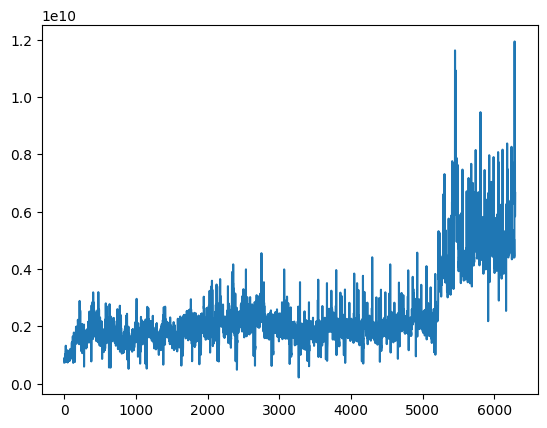

In [ ]:
plt.plot(df2)

In [ ]:
df5=df.reset_index()['High']
df3=df.reset_index()['Close']
df4=df.reset_index()['Low']

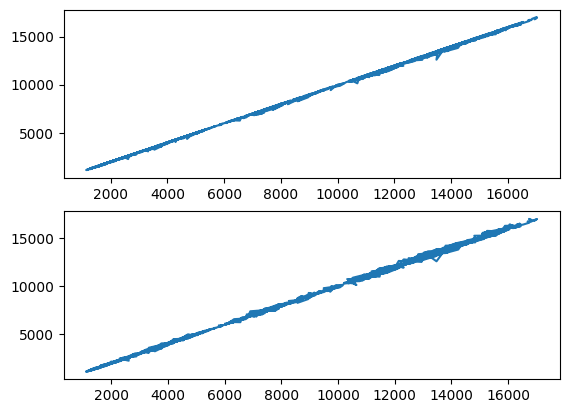

In [ ]:
fig, ax = plt.subplots(2)
ax[0].plot(df5,df1)
ax[1].plot(df3,df1)

In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00


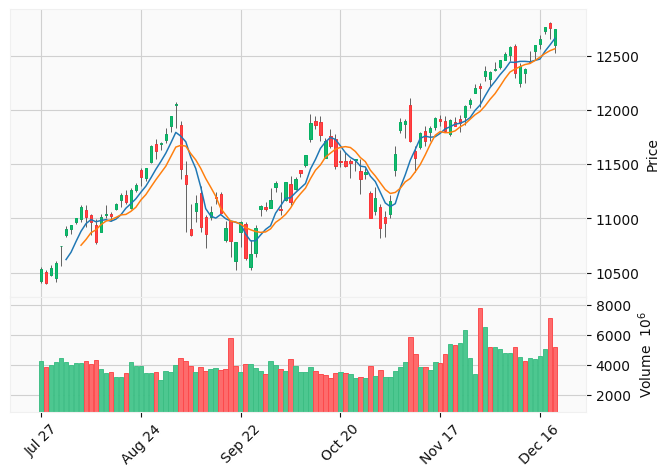

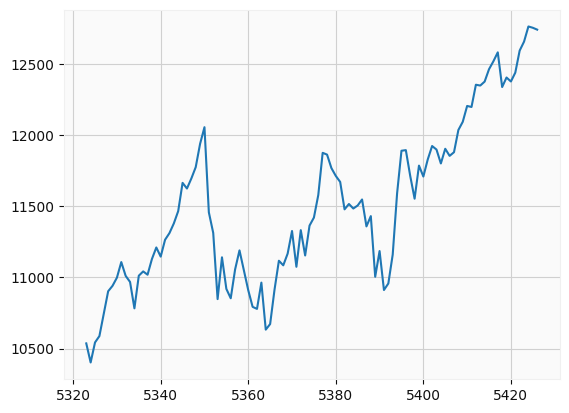

In [ ]:
import pandas as pd
import mplfinance as mpf

# Load the stock price data
df = pd.read_csv('/content/^IXIC.csv')

# Convert the date column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the candlestick chart
mpf.plot(df[5323:5427], type='candle',style='yahoo', volume=True, mav=(6,9))

df5=df.reset_index()['Close']

plt.plot(df5[5323:5427])



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.0850618 ]
 [0.08152331]
 [0.08337662]
 ...
 [0.9868006 ]
 [0.99949117]
 [0.99262949]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(4088, 2202)

In [ ]:
train_data

array([[0.0850618 ],
       [0.08152331],
       [0.08337662],
       ...,
       [0.22484843],
       [0.22146294],
       [0.22949462]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 251
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(3836, 251)
(3836,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1950, 251)
(1950,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(251,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 251, 50)           10400     
                                                                 
 lstm_11 (LSTM)              (None, 251, 50)           20200     
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
60/60 [==============================] - 41s 568ms/step - loss: 8.3427e-04 - val_loss: 7.6479e-04
Epoch 2/100
60/60 [==============================] - 33s 554ms/step - loss: 4.9655e-05 - val_loss: 8.3448e-04
Epoch 3/100
60/60 [==============================] - 33s 554ms/step - loss: 4.4658e-05 - val_loss: 8.0128e-04
Epoch 4/100
60/60 [==============================] - 32s 538ms/step - loss: 4.5420e-05 - val_loss: 0.0014
Epoch 5/100
60/60 [==============================] - 34s 556ms/step - loss: 4.2153e-05 - val_loss: 0.0010
Epoch 6/100
60/60 [==============================] - 32s 541ms/step - loss: 3.8437e-05 - val_loss: 7.7945e-04
Epoch 7/100
60/60 [==============================] - 33s 555ms/step - loss: 3.5988e-05 - val_loss: 0.0011
Epoch 8/100
60/60 [==============================] - 33s 550ms/step - loss: 3.6479e-05 - val_loss: 5.5565e-04
Epoch 9/100
60/60 [==============================] - 34s 564ms/step - loss: 3.4407e-05 - val_loss: 6.5678e-04
Epoch 10/100
60/60 [==

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

61/61 [==============================] - 7s 114ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2756.8543814971376

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

10508.83184709956

In [ ]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (1950,1) into shape (2252,1)